Stitching status: 0


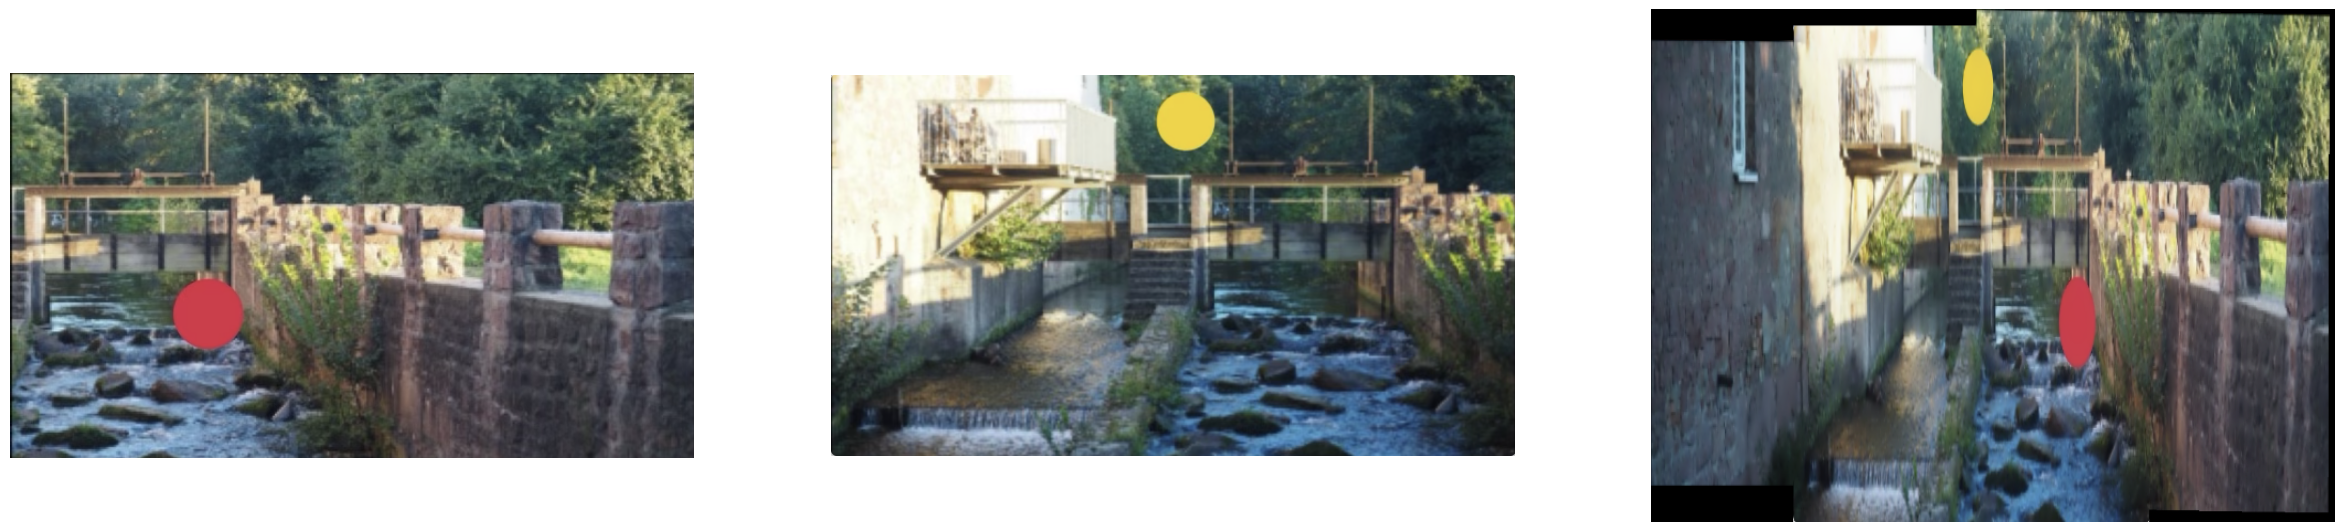

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import math
from PIL import Image

# Stitch Images
imagefiles = glob.glob("test/*")
imagefiles.sort()

images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

num_images = len(images)

# Display Images
plt.figure(figsize=[30,10]) 
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i+1) 
    plt.axis('off')
    plt.imshow(images[i])

stitcher = cv2.Stitcher_create(mode=cv2.Stitcher_SCANS)
status, result = stitcher.stitch(images)
print("Stitching status:", status) 

if status == 0:
    #plt.figure(figsize=[30, 10])
    ##plt.imshow(result)
    ##plt.show()
    ## Save the stitched image
    #cv2.imwrite('stitched.png', result)
    ##plt.imshow(result)
    ## Open the image file
    #image_path = 'stitched.png'
    #image = Image.open(image_path)
#
    ## Specify the path and filename for the new image file
    #new_image_path = 'color_detection.png'
#
    ## Save the image to the new file
    #image.save(new_image_path)
#
    ## Close the image file
    ##plt.imshow(image)
    #image.close()
    # Perform color detection on the stitched image
    #input_img = cv2.imread("stitched.png")
    #plt.imshow(input_img)
    img = cv2.resize(result, (640, 480))
    #plt.imshow(img)
    # Make a copy to draw contour outline
    input_image_cpy = img.copy()
    #plt.imshow(input_image_cpy)
    hsv = cv2.cvtColor(input_image_cpy, cv2.COLOR_BGR2HSV)
    plt.imshow(hsv)
    # Define range of red color in HSV
    lower_red = np.array([0, 50, 50])
    upper_red = np.array([10, 255, 255])

    # Define range of yellow color in HSV
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])

    # Define range of blue color in HSV
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([130, 255, 255])

    # Create a mask for red color
    mask_red = cv2.inRange(hsv, lower_red, upper_red)

    # Create a mask for yellow color
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)

    # Create a mask for blue color
    mask_blue = cv2.inRange(hsv, lower_blue, upper_blue)

    # Find contours in the red mask
    contours_red, _ = cv2.findContours(mask_red, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Find contours in the yellow mask
    contours_yellow, _ = cv2.findContours(mask_yellow, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Find contours in the blue mask
    contours_blue, _ = cv2.findContours(mask_blue, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through the red contours and draw a rectangle around them
    for cnt in contours_red:
        contour_area = cv2.contourArea(cnt)
        if contour_area > 1000:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)
            cv2.putText(img, 'Red', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Loop through the yellow contours and draw a rectangle around them
    for cnt in contours_yellow:
        contour_area = cv2.contourArea(cnt)
        if contour_area > 1000:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 255), 2)
            cv2.putText(img, 'Yellow', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 255), 2)

    # Loop through the blue contours and draw a rectangle around them
    for cnt in contours_blue:
        contour_area = cv2.contourArea(cnt)
        if contour_area > 1000:
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            cv2.putText(img, 'Blue', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display final output for multiple color detection using OpenCV
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()